In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import geopandas as gpd

from urllib import request
from geotext import GeoText

from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

from shapely.geometry import Point, Polygon
import descartes

import warnings
warnings.filterwarnings('ignore')

In [4]:
## this is where we grab the raw .txt file from gutenberg

url = "http://www.gutenberg.org/files/3176/3176-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf-8')
print(f'{type(raw)}, \n{len(raw)}, \n{raw[:501]}')

<class 'str'>, 
1145397, 
﻿Project Gutenberg's The Innocents Abroad, by Mark Twain (Samuel Clemens)

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net


Title: The Innocents Abroad

Author: Mark Twain (Samuel Clemens)

Release Date: August 18, 2006 [EBook #3176]
Last Updated: February 23, 2018

Language: English


In [5]:
type(response)

http.client.HTTPResponse

In [6]:
## parses the text for geographic entities

places = GeoText(raw)
cities = list(places.cities)
cities

['Tangier',
 'Paris',
 'Temple',
 'Como',
 'Garibaldi',
 'Rome',
 'Roman',
 'Naples',
 'Naples',
 'Bay',
 'Smyrna',
 'Ferguson',
 'Jacksonville',
 'Jericho',
 'Fountain',
 'Paradise',
 'Damascus',
 'George',
 'Pen',
 'Palestine',
 'Tiberias',
 'Nazareth',
 'Godfrey',
 'David',
 'Jericho',
 'Bethany',
 'March',
 'Palestine',
 'Holiday',
 'San Francisco',
 'New York',
 'New York',
 'York',
 'Paris',
 'Genoa',
 'Genoa',
 'Columbus',
 'Verona',
 'Venice',
 'Parma',
 'Correggio',
 'Bologna',
 'Florence',
 'Florence',
 'Pisa',
 'Lucca',
 'Roman',
 'Florence',
 'Naples',
 'Rome',
 'Garibaldi',
 'Rome',
 'Naples',
 'Palermo',
 'Naples',
 'Athens',
 'Messina',
 'Piraeus',
 'Athens',
 'Bay',
 'Corinth',
 'Athens',
 'Balaklava',
 'Troy',
 'Asia',
 'Smyrna',
 'Asia',
 'Beirut',
 'Damascus',
 'Jerusalem',
 'Tiberias',
 'Nazareth',
 'Bethany',
 'Bethlehem',
 'Beirut',
 'Damascus',
 'Tiberias',
 'Alexandria',
 'Alexandria',
 'Cairo',
 'Memphis',
 'Cagliari',
 'Palma',
 'Parma',
 'Valencia',
 'Duncan'

In [7]:
## Nominatum searches Open Street Map data

geolocator = Nominatim(timeout=2)

lat_lon = []
for city in cities: 
    try:
        location = geolocator.geocode(city)
        if location:
            print(location.latitude, location.longitude)
            lat_lon.append(location)
    except GeocoderTimedOut as e:
        print("Error: geocode failed on input %s with message %s"%(city, e))
lat_lon

35.777103 -5.803792
48.8566969 2.3514616
31.098207 -97.3427847
45.939475900000005 9.149410145408947
-29.2562253 -51.5269167
41.8933203 12.4829321
48.836297599999995 1.047626206618487
40.8359336 14.2487826
40.8359336 14.2487826
47.2885 5.71839
38.4147331 27.1434119
38.744707 -90.3038975
30.3321838 -81.655651
31.855987 35.4598851
40.125252 -87.2497418
36.1150858 -115.1734142
33.5130695 36.3095814
-33.964444 22.459722
18.6973659 73.13672046831282
31.94696655 35.27386547291496
32.7938522 35.5328566
32.7066301 35.3048161
38.9556031 -90.1867765
47.0385725 26.668268947511713
31.855987 35.4598851
40.2683344 -94.0282861
48.0578573 7.7790038
31.94696655 35.27386547291496
28.18779 -82.7395454
37.7790262 -122.4199061
40.7127281 -74.0060152
40.7127281 -74.0060152
53.9590555 -1.0815361
48.8566969 2.3514616
44.40726 8.9338624
44.40726 8.9338624
39.9622601 -83.0007065
45.4384958 10.9924122
45.4371908 12.3345898
44.8013678 10.3280833
44.770561 10.7797829
44.4936714 11.3430347
43.7698712 11.2555757
43.7

45.4371908 12.3345898
45.4371908 12.3345898
45.4371908 12.3345898
39.5695818 2.6500745
45.4371908 12.3345898
47.0385725 26.668268947511713
39.9622601 -83.0007065
35.1770785 -94.2654285
51.7069911 46.7483653
35.1170873 -80.723718
45.4371908 12.3345898
45.4371908 12.3345898
45.4371908 12.3345898
45.4371908 12.3345898
44.40726 8.9338624
45.939475900000005 9.149410145408947
45.4371908 12.3345898
45.4371908 12.3345898
45.4371908 12.3345898
45.4371908 12.3345898
44.4936714 11.3430347
43.9740957 10.868708114044026
43.7698712 11.2555757
47.0385725 26.668268947511713
43.7698712 11.2555757
43.7698712 11.2555757
43.7698712 11.2555757
43.7698712 11.2555757
43.7698712 11.2555757
43.7698712 11.2555757
43.7698712 11.2555757
43.7698712 11.2555757
43.7698712 11.2555757
43.7698712 11.2555757
43.7698712 11.2555757
43.7159395 10.4018624
43.7159395 10.4018624
43.7159395 10.4018624
33.5130695 36.3095814
39.957373950000004 26.238017461011644
43.7159395 10.4018624
53.5486435 14.5657399
40.8359336 14.2487826
4

33.5130695 36.3095814
33.5130695 36.3095814
33.5130695 36.3095814
33.5130695 36.3095814
33.5130695 36.3095814
33.5130695 36.3095814
33.5130695 36.3095814
33.5130695 36.3095814
41.8933203 12.4829321
33.5130695 36.3095814
33.5130695 36.3095814
33.5130695 36.3095814
33.5130695 36.3095814
33.5130695 36.3095814
51.2086975 89.2343748
33.5130695 36.3095814
33.5130695 36.3095814
33.5130695 36.3095814
33.5130695 36.3095814
21.420847 39.826869
33.5130695 36.3095814
33.5130695 36.3095814
33.5130695 36.3095814
36.9169036 34.8834999
31.778345 35.2250786
33.5130695 36.3095814
33.5130695 36.3095814
33.5130695 36.3095814
36.9169036 34.8834999
33.5130695 36.3095814
33.5130695 36.3095814
31.778345 35.2250786
-33.964444 22.459722
33.5130695 36.3095814
33.5130695 36.3095814
33.5130695 36.3095814
33.5130695 36.3095814
33.5130695 36.3095814
33.5130695 36.3095814
33.5130695 36.3095814
33.5130695 36.3095814
40.881735899999995 40.27544376928809
33.5130695 36.3095814
33.5130695 36.3095814
33.5130695 36.3095814


37.176059949999996 -3.5881102773279347
12.1360374 -61.6904045
37.8845813 -4.7760138
36.5297438 -6.2928976
36.5297438 -6.2928976
38.7077507 -9.1365919
34.5023029 -97.9578129
32.6496497 -16.9086783
40.7127281 -74.0060152
40.7127281 -74.0060152
40.7127281 -74.0060152
51.2086975 89.2343748
35.777103 -5.803792
41.8933203 12.4829321
31.778345 35.2250786
31.94696655 35.27386547291496
31.94696655 35.27386547291496
45.4371908 12.3345898
40.8359336 14.2487826
43.7698712 11.2555757
41.8933203 12.4829321
32.7066301 35.3048161
31.778345 35.2250786
31.855987 35.4598851
31.94696655 35.27386547291496
36.7753606 3.0601882
36.5297438 -6.2928976
40.7127281 -74.0060152
37.7790262 -122.4199061
40.7127281 -74.0060152
48.8566969 2.3514616
45.939475900000005 9.149410145408947
45.4371908 12.3345898
37.9839412 23.7283052
41.8933203 12.4829321
31.778345 35.2250786
33.5130695 36.3095814
32.2745912 -90.1320311
36.4884715 -79.7667026
40.881735899999995 40.27544376928809
26.2159066 -98.3252932
64.837845 -147.716675


[Location(Tanger ⵟⴰⵏⵊⴰ طنجة, pachalik de Tanger طنجة, Préfecture de Tanger-Assilah عمالة طنجة-أصيلة, Tanger-Tétouan-Al Hoceima ⵟⴰⵏⵊ-ⵟⵉⵜⴰⵡⵉⵏ-ⵍⵃⵓⵙⵉⵎⴰ طنجة-تطوان-الحسيمة, 90013, Maroc, (35.777103, -5.803792, 0.0)),
 Location(Paris, Île-de-France, France métropolitaine, France, (48.8566969, 2.3514616, 0.0)),
 Location(Temple, Bell County, Texas, United States of America, (31.098207, -97.3427847, 0.0)),
 Location(Como, Lombardia, Italia, (45.939475900000005, 9.149410145408947, 0.0)),
 Location(Garibaldi, Região Geográfica Imediata de Bento Gonçalves, Região Geográfica Intermediária de Caxias do Sul, Rio Grande do Sul, Região Sul, 95720-000, Brasil, (-29.2562253, -51.5269167, 0.0)),
 Location(Roma, Roma Capitale, Italia, (41.8933203, 12.4829321, 0.0)),
 Location(Roman, Mesnils-sur-Iton, Bernay, Eure, Normandie, France métropolitaine, 27240, France, (48.836297599999995, 1.047626206618487, 0.0)),
 Location(Napoli, Campania, Italia, (40.8359336, 14.2487826, 0.0)),
 Location(Napoli, Campania, It

In [8]:
df = pd.DataFrame(lat_lon, columns=['City Name', 'Coordinates'])
df.head(7)

,City Name,Coordinates
0,"Tanger ⵟⴰⵏⵊⴰ طنجة, pachalik de Tanger طنجة, Pr...","(35.777103, -5.803792)"
1,"Paris, Île-de-France, France métropolitaine, F...","(48.8566969, 2.3514616)"
2,"Temple, Bell County, Texas, United States of A...","(31.098207, -97.3427847)"
3,"Como, Lombardia, Italia","(45.939475900000005, 9.149410145408947)"
4,"Garibaldi, Região Geográfica Imediata de Bento...","(-29.2562253, -51.5269167)"
5,"Roma, Roma Capitale, Italia","(41.8933203, 12.4829321)"
6,"Roman, Mesnils-sur-Iton, Bernay, Eure, Normand...","(48.836297599999995, 1.047626206618487)"


In [9]:
## turn cordinates into point objects with shapely
## i'm switching latitute and longitude positions because 
## the map I download does that for some reason

geometry = [Point(x[1], x[0]) for x in df['Coordinates']]
geometry[:7]

In [10]:
## coordinate system I'm using
crs = {'init': 'epsg:4326'}

## convert df to geo df
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
geo_df.head(7)

,City Name,Coordinates,geometry
0,"Tanger ⵟⴰⵏⵊⴰ طنجة, pachalik de Tanger طنجة, Pr...","(35.777103, -5.803792)",POINT (-5.80379 35.77710)
1,"Paris, Île-de-France, France métropolitaine, F...","(48.8566969, 2.3514616)",POINT (2.35146 48.85670)
2,"Temple, Bell County, Texas, United States of A...","(31.098207, -97.3427847)",POINT (-97.34278 31.09821)
3,"Como, Lombardia, Italia","(45.939475900000005, 9.149410145408947)",POINT (9.14941 45.93948)
4,"Garibaldi, Região Geográfica Imediata de Bento...","(-29.2562253, -51.5269167)",POINT (-51.52692 -29.25623)
5,"Roma, Roma Capitale, Italia","(41.8933203, 12.4829321)",POINT (12.48293 41.89332)
6,"Roman, Mesnils-sur-Iton, Bernay, Eure, Normand...","(48.836297599999995, 1.047626206618487)",POINT (1.04763 48.83630)


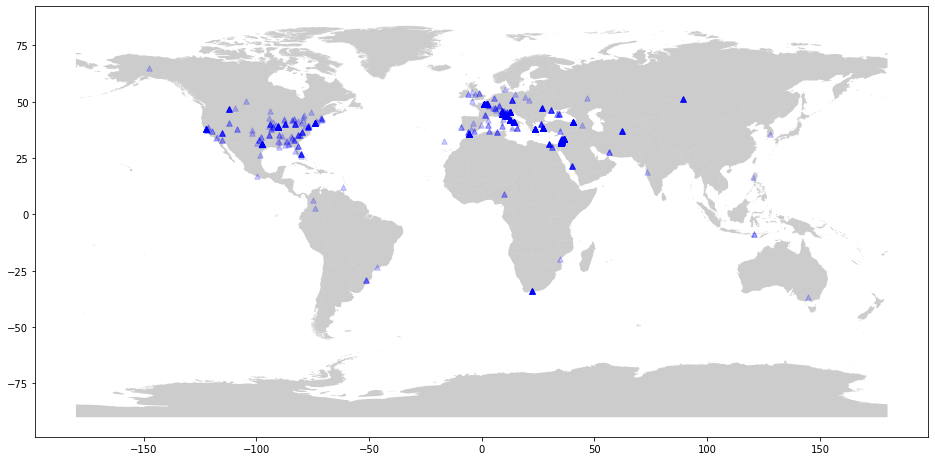

In [22]:
## world map .shp file I downloaded
countries_map = gpd.read_file('files/Countries_WGS84.shp')

f, ax = plt.subplots(figsize=(16, 16))
countries_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df['geometry'].plot(ax=ax, markersize = 30, color = 'b', marker = '^', alpha=.2)